# Dimensionality Reduction Techniques on Python - 3

# Locally Linear Embedding

Locally Linear Embedding is a non-linear dimensionality reduction technique that recovers global nonlinear structure from locally linear fits, thereby eliminating the need to estimate pairwise distances between widely separated data points such as Isomap.

The idea behind LLE is that each local patch on our manifold can be approximated linearly by writing each point as a weighted sum of its neighbors. The number of neighbors can be selected by using one of the approaches that I mentioned in Isomap such as distance threshold epsilon or a given number of neighbors n. The algorithm does this in three main steps.

**1. The algorithm first selects the number of neighbors.**

**2. In the second step, the algorithm reconstructs the points by using nearby points.**

Given points $x^r$ and their neightbors $x^s_r$ in the original space, we can calculate the reconstruction loss with the following equation.

$$E^w\left(W\:|\:X\right)=\sum _i\:\left(\left|\left|x_i-\sum_jW_{ij}x_j\right|\right|^2\right)$$

subject to

$$W_{ij}=0\:$$ if $x_j$ does not belong to the set that $x_i$ is reconstrucred and $\:\sum_jW_{ij}=1$
 


By minimizing the error function we can find the reconstruction weights $W_{}$. We expect that the reconstruction weights $W_{rs}$ reflect the intrinsic geometric properties of the data not only for local patches of the manifold but also for the new space we are mapping the instances.

To minimize the reconstruction loss, we can utilize Lagrange multipliers and the constraint $\:\sum_jW_{j}=1$. The optimal weights $W_{j}$ are given by:

$$w_j=\frac{\sum _kC_{jk}^{-1}}{\sum _{lm}C^{-1}_{lm}}$$

where C is the local covariance matrix and defined as:

$$\:C_{jk}=\left(x-\eta _j\right)\left(x-\eta _k\right)$$

In practice, we can also find the optimal weights by solving the linear systems of the equations, $\sum_jC_{jk}w_k$. However, I preferred not to mention it here but you can find more about it in the additional sources part.


**3. In the third step, we will keep the weights $w_{ij}$ fixed and minimize the following embedding cost function $\Phi \left(Y\right)$ to map high dimensional observations $X_i$ on a low dimensional space.**

$$\Phi \left(Y\right)=\sum _i\left|\left|Y_i-\sum _jw_{ij}Y_j\right|\right|$$

To do that we need to solve the following optimization problem:

$$min_Y\: \Phi \left(Y\right)=\sum _i\left|\left|Y_i-\sum _jw_{ij}Y_j\right|\right|$$

Now let's play with this loss function a bit to simplfy it.

$$\Phi \left(Y\right)=\sum _i\left|\left|Y_i-\sum _jw_{ij}Y_j\right|\right|==\:\sum _iy^2_i-y_i\sum _jw_{ij}y_j-y_i\sum _jw_{ij}y_j+\left(\sum _jw_{ij}y_j\right)^2=Y^TY-Y^T\left(wY\right)-\left(wY\right)^TY+\left(wY\right)^T\left(wY\right)$$

$$\Phi \left(Y\right)=Y^TY-Y^T\left(wY\right)-\left(wY\right)^TY+\left(wY\right)^T\left(wY\right)=Y^T\left(I-w\right)^T\left(I-w\right)Y$$

Let's define an $m x m$ matrix, M to make $\Phi \left(Y\right)$ even simpler and reduce the need of computations: $M=\left(I-w\right)^T\left(I-w\right)$

and finally we get:

$$\Phi \:\left(Y\right)=Y^TMY$$

**4. Now let's use Lagrange multipliers to find the values that minimizes the function.**

$$L\left(Y,\mu \right)=Y^TMY-\mu \left(\frac{1}{N}Y^TY-1\right)$$

subject to the constraint:

$$\frac{1}{N}Y^TY=I$$

This constrains the embedding vectors to have unit covariance and guarantees that we avoid the degenerate solution.

To find the values that minimize the function we need to take its derivative with respect to Y.

$$\frac{\partial L\left(Y,\mu \:\right)}{\partial Y}=2MY-\frac{2\mu Y}{N}=MY=\frac{\mu }{N}Y$$

Also we have another constraint that we center the coordinates on the origin (mean-zero constraint)

$$\sum _iY_i=0\:$$


We arrive at the point that Y must be an eigenvector of M. Here Y is called an eigenfunction since it is defined for all the points in the data set and since we are trying to minimize $Y^TMY$, we are interested in the eigenfunctions that correspond to the smallest eigenvalues. These eigenvalues are given by the bottom eigenfunctions. These eigenvalues will also give us the embedding coordinates found by LLE.

**Additional Sources:**

1. [Nonlinear Dimensionality Reduction by Locally Linear Embedding](https://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf)
1. [An Introduction to Locally Linear Embedding](https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf)
1. [Nonlinear Dimensionality Reduction I: Local Linear Embedding](https://www.stat.cmu.edu/~cshalizi/350/lectures/14/lecture-14.pdf)
1. [23 Reducing dimensions Local Linear Embedding](https://www.youtube.com/watch?v=Y1TBFuj-8iw)

In [1]:
import mpl_toolkits.mplot3d  
from numpy.random import RandomState
from sklearn import manifold, datasets
from matplotlib import ticker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import numpy as np
sns.set_theme(style="whitegrid")
rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

Let's use the algorithm.

In [2]:
from sklearn.manifold import LocallyLinearEmbedding

In [3]:
LLE=LocallyLinearEmbedding(n_neighbors=20,eigen_solver="arpack",method="standard",neighbors_algorithm="brute")

In [4]:
X_reduced=LLE.fit_transform(S_points)

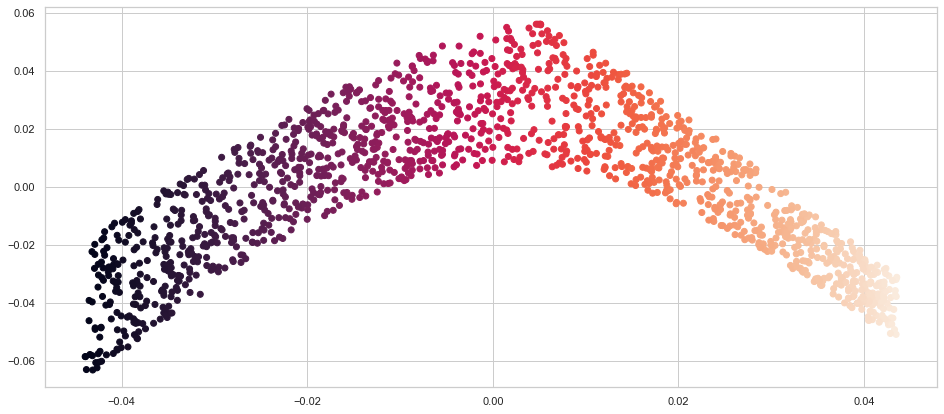

In [5]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

LLE has very similar parameters to ISOMAP. In addition, it has another parameter that we should pay the most attention to, it is the `method` argument. This argument can change drastically the embedding result, for instance:

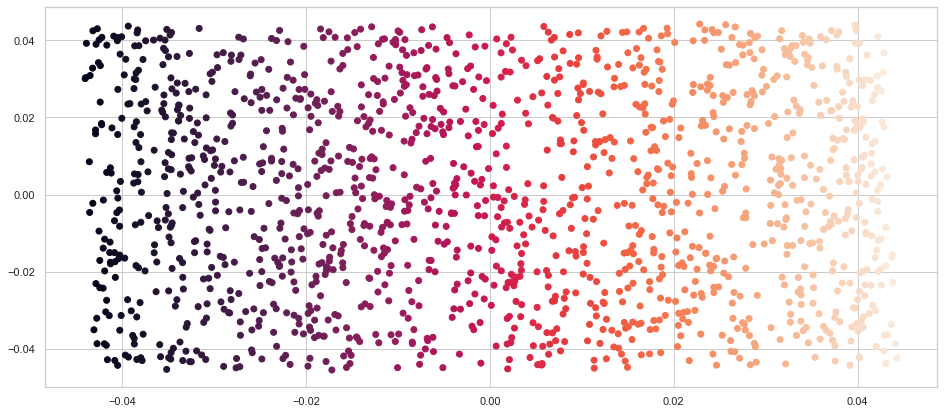

In [6]:
LLE=LocallyLinearEmbedding(n_neighbors=20,eigen_solver="arpack",method="modified",neighbors_algorithm="brute")
X_reduced=LLE.fit_transform(S_points)
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

Additionally, this parameter we can use Hessian Eigenmaps by setting `method=hessian`. I will not go into details of Hessian Eigenmaps but you can find more about them in the [Manifold learning](https://scikit-learn.org/stable/modules/manifold.html#hessian-eigenmapping) documentation. 

Also check out documentation for LLE [link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html)

# Laplacian Eigenmaps (a.k.a Spectral Embedding)

Laplacian Eigenmaps are very similar to LLE. As LLE, it tries to preserve the local proximity relations and maps nearby input patterns to nearby outputs and has three main steps: Constructing the Adjacency Graph, Choosing the weights for edges of the graph, Obtaining the Eigenmaps. 

The algorithm indeed is very similar to LLE but the difference of this algorithm comes with the question, how do we define the local structure? Instead of representing the points based on their neighbors as we did in LLE, Laplacian eigenmaps compute similarities between data points, then optimizes the cost function for the low-dimensional data points which will preserve this similarity in the embedding of the data points.


**1. As in LLE, the algorithm starts by finding the neighbors, to do that we need to define closeness. We can again do that either by finding the k-nearest neighbors or defining some maximum epsilon distance as I introduced in LLE.**

**2. In the second step, we will weight the edges of the graph that we defined in the first step to construct a weighted graph $G\left(V,E\right)$.** We can use two approaches:

   1. We can use the Gaussian kernel to convert Euclidean distance to a similarity value and weight the edges according to this function. For some user-defined $\sigma$ value:

$$w_{ij}=exp\left(\frac{\left|\left|x_i-x_j\right|\right|^2}{2\sigma ^2}\right)$$

   2. Alternatively, we can assign the weights, $w_{ij}=1$ if vertices i and j are connected by an edge, otherwise say  $w_{ij}=0$


**3. Compute eigenvalues and eigenvectors for the generalized eigenvector problem:**

To tune the weights, we will use the following cost function:

$$\sum _{ij}\left(w_{ij}\left|\left|y_i-y_j\right|\right|^2\right)$$


We can go further simplfy the function as follows:

$$\sum _{ij}\left(w_{ij}\left|\left|y_i-y_j\right|\right|^2\right)=\sum_{ij}\left(\:y_i^2+y_j^2-2y_iy_j\right)w_{ij}=\sum _i\:\left(y_i^2D_{ii}\right)+\sum_j\left(y_j^2D_{jj}\right)-2\:\sum _{ij}\left(y_iy_jw_{ij}\right)=2y^TLy$$


where $D_{ii}\:=\:\sum _{ij}\left(w_{ij}\right)$ 


**4. Now we can define the [graph Laplacian (a.k.a Laplacian Matrix)](https://mbernste.github.io/posts/laplacian_matrix/):**

$$L=D-W$$

and our objective is defined as follows:

$$argmin\left(y^TLy\right)$$

where  D is the diagonal matrix, and W is the similarity matrix. Also it is subject to constraints

$$y^TDy=1\:\:and\:\:y^TD1=0$$

The  vector y that minimizes the objective function is given by the minimum eigenvalue solution to the generalized eigenvalue problem which is defined as:

$$Lf=\lambda Df$$

where $f_0,.....,f_{k-1}$ represent the eigenvectors to this problem, in other words, solutions to the generalized eigenvector problem above which are ordered according to their eigenvalues.

$$\begin{pmatrix}Lf_0=\lambda _0Df_0\\ Lf_1=\lambda _1Df_1\\ .\\ .\\ .\\ .\\ Lf_{k-1}=\lambda_{k-1}Df_{k-1}\end{pmatrix}$$

From the k number of eigenvectors represented above, we omit the eigenvector $f_0$ corresponding to eigenvalue 0 and use the next m eigenvectors for obtaining the lower-dimensional embedding.

**Additional Sources:**

1. [Kiran Vodrahalli (knv2109)](https://kiranvodrahalli.github.io/notes/nov-26-18-uml-notes.pdf)
2. [Demystifying Spectral Embedding](https://medium.com/mlearning-ai/demystifying-spectral-embedding-b2368bba580)
3. [Laplacian Eigenmaps for Dimensionality Reduction and Data Representation](https://www2.imm.dtu.dk/projects/manifold/Papers/Laplacian.pdf)
4. [Laplacian Eigenmaps and Spectral Techniques for Embedding and Clustering](https://proceedings.neurips.cc/paper/2001/file/f106b7f99d2cb30c3db1c3cc0fde9ccb-Paper.pdf)
5. [Spectral Graph Embedding](https://perso.telecom-paristech.fr/bonald/documents/spectral.pdf)
6. [On Laplacian Eigenmaps for Dimensionality Reduction](https://juanitorduz.github.io/documents/orduz_pydata2018.pdf)
7. [Convergence of Laplacian Eigenmaps](https://proceedings.neurips.cc/paper/2006/file/5848ad959570f87753a60ce8be1567f3-Paper.pdf)
8. [Spectral Methods for Dimensionality Reduction](https://cseweb.ucsd.edu/~saul/papers/smdr_ssl05.pdf)

Let's use the algorithm.

In [7]:
from sklearn.manifold import SpectralEmbedding

In [8]:
Laplacian_maps = SpectralEmbedding(n_neighbors=100,eigen_solver="arpack",affinity="rbf",gamma=0.25)

In [9]:
X_reduced=Laplacian_maps.fit_transform(S_points)

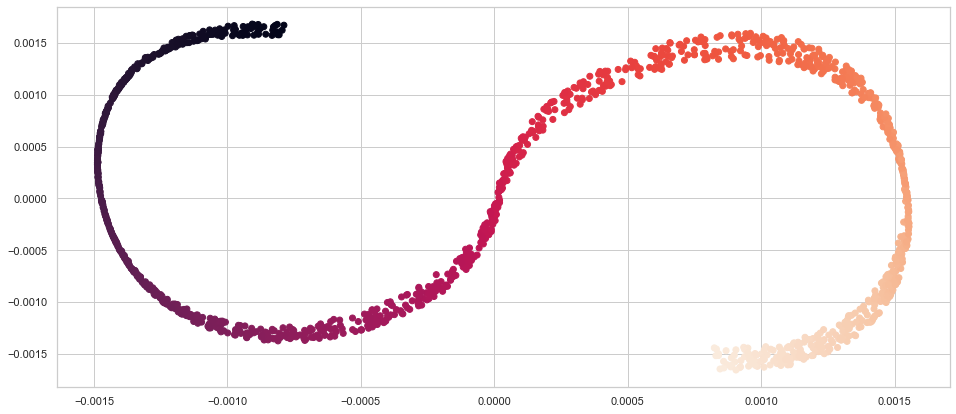

In [10]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

Check out the documentation to learn more about parameters [link](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html#sklearn.manifold.SpectralEmbedding)

# Uniform Manifold Approximation and Projection (UMAP)

The original research paper on UMAP involves lots of stuff from fuzzy logic, category theory, and topology. This is not because the algorithm is completely different than the other neighborhood-based algorithms but it is because the UMAP paper, unlike the other algorithms constructs a very powerful theory of why graph-based algorithms work well by using fuzzy logic, category theory, and topology. From the perspective of these subjects, the paper introduces the algorithm and overcomes many of the problems that t-SNE has such as even though improvements of Flt-SNE, t-SNE can still be very slow. On the other hand, I preferred not to mention the details of fuzzy logic, category theory, and topology in the algorithm explanation above. There are a couple of reasons:

1. I am not much familiar with category theory, topology, and fuzzy logic. I spent some of my time reading sources recommended in the original paper or on other websites to understand the algorithm more deeply. However, in the end, I still don't feel much comfortable about these topics.
2. Much of the work in the paper is actually used for providing a basis for why graph-based algorithms are working well. On the other hand, when you take these things out, UMAP is actually very similar to t-SNE and improves weak aspects of t-SNE even those that Flt-tSNE couldn't improve. 
3. Writing about all this stuff would make this notebook so much longer than I want it would be. I am trying to strike a balance between theory and practice in these notebooks, and sometimes I have to omit some important topics that are actually the foundations of the algorithms. For instance, the Laplace-Beltrami operator is an important topic for Laplacian Eigenmaps, however, talking about this operator would require a much deeper mathematical background that I cannot provide in these notebooks.

Therefore, I will explain the algorithm by avoiding category theory, topology, and fuzzy logic. Let's get started.

Before going into mathematical details, I would recommend watching these two videos from statquest to everyone [link](https://www.youtube.com/watch?v=eN0wFzBA4Sc) and [link2](https://www.youtube.com/watch?v=jth4kEvJ3P8&t=78s). Afterwards, reading this article from the algorithm creators can be very good for both understanding the algorithm in a deeper way as well as looking at graph based algorithms from topology perspective [link](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html).



## Mathematical Details behind UMAP

Let's go on.

Our objective in UMAP: For the given dataset $D$ in $R^N$, find a representation of the data in a lower-dimensional space $R^m$. 

To do that, we will assume that the data is drawn from some [Riemannian manifold](https://becominghuman.ai/what-are-riemannian-manifolds-and-why-do-we-care-part-1-1bfbb000f012) M, and then we will map into $R^m$ by using some embedding $\phi :\:M\:\rightarrow \:R^m$. To construct the algorithm, we need to following assumptions:

1. $D$ is uniformly drawn from M (if you read the article that I shared in the beginning, you'll realize that this is needed for picking a good radius)

2. M is locally connected and there are enough points in $D$ that no point in $D$ is isolated in its connected component. These connectivity assumptions imply that every point in $D$ is connected in M to its nearest neighbor in $D → R^m$

3. We also assume that the distance function $d$ on M is locally constant where $d\left(x,y\right)\ge 0,\:d\left(x,y\right)\:=d\left(y,x\right),\:d\left(x,y\right)=0$ if and only if $x=y$ and $d\left(x,z\right)\le d\left(x,y\right)+d\left(y,z\right)\:$ 

The algorithm has two main steps: we will first be constructing a graph in the high dimension and then find the most similar graph in the lower dimension which represents the higher dimensional data.


1. Like the other graph-based algorithms, UMAP starts by constructing a weighted k-neighborhood graph. Given an neighbor parameter k, for each datapoint $x_i$ we compute the set $\left\{x_{i_1},.....,x_{i_k}\right\}$ of the k nearest neighbors of $x_i$ under the distance metric $d$. For this purpose, UMAP uses the nearest neighbor descent. and For each $x_i$ we need to define $p_i$ and $\sigma_i$. $p_i$ that represents the distance from each i-th data point to its first nearest neighbor which ensures the local connectivity and $\sigma_i$ is the normalization factor.

$$ρ_i\:=\:min\left\{d\left(x_i,x_{i_j}\right)\:|\:1\:\le \:\:j\:\le \:\:k,\:d\left(x_i,x_{i_j}\right)\:>\:0\right\}$$

and $\sigma_i$ is calculated by the following:

$$\sum _{j=1}^kexp\left(\frac{-max\left(0,d\left(x_i,x_{i_j}\right)-p_i\right)}{\sigma _i}\right)=log_2\left(k\right)$$

Whereas, we were using euclidean distance in t-SNE, in UMAP we can use any distance function of our choice and the probabilities are not normalized, unlike t-SNE. The equation above is used for calculating high dimensional similarities between the neighbors. Moreover, since the algorithm uses locally varying metrics for connecting points (This is an important feature of the algorithm which solves the curse of dimensionality), in some cases the weight of the graph between A and B nodes may not be equal to the weights between the nodes B and A. Therefore, we need to use symmetrization. The symmetrization in UMAP is derived from the fuzzy set union and defined as:

$$p_{ij}=p_{i|j}+p_{j|i}-p_{i|j}p_{j|i}$$


Now let's define our weighted graph $G=\left(V,E,w\right)$. In this graph, the vertices V of G are a simple set of X and the directed edges will be formed as the following:

$$E=\left\{\left(x_i,x_{i_j}\right)|\:1\:\le \:j\:\le \:k,\:1\:\le \:i\:\le \:N\right\}$$

and the weight function (remember that weights represents how "close" a given point is to another) w by

$$w\left(\left(x_i,x_{i_j}\right)\right)=exp\left(\frac{-max\left(0,d\left(x_i,x_{i_j}\right)-p_i\right)}{\sigma _i}\right)$$

Now we finally get the final weighted graph, the weights of its edges representing the likelihood that two points are "connected" in our high-dimensional manifold. In UMAP lingo, for a given point $x_i$, we above built a Cech complex, which is a way of representing a topology set, by describing each data point as a 0-simplex and then we connect each point (0-simplex) to other points within the unit ball around it  by using 1-simplices and 2-simplices until all the points we have are part of the complex. Moreover, the Nerve theorem guarantees that this graph we built will preserve the topological structure of the data.

2. In the second step, we will use spectral embedding to assign initial low-dimensional coordinates (remember that t-SNE uses random initialization). The idea of using spectral embedding for initialization actually derives from [that paper](https://arxiv.org/pdf/1706.02582.pdf) which proposes that minimization of KL-divergence in the initial stage of tSNE with early exaggeration is equivalent to constructing the Graph Laplacian. Then we will calculate the low-dimensional similarities by using:

$$w_{ij}=\left(1+a\left|\left|y_i-y_j\right|\right|_2^{2b}\right)^{-1}$$
 
where a and b are user-defined positive values and are generally set to a ≈ 1.929 and b ≈ 0.791 by default. Setting a = 1 and b = 1 results in getting the same low-dimensional similarity scores in t-SNE.

After calculating the low-dimensional similarity scores, we need to compare the similarities in the original high-dimensional space and embedded low-dimensional to tune the projection of points in the low-dimensional space in order to find a good low-dimensional representation. UMAP uses the binary cross-entropy cost function for determining the goodness of embedding.

$$C_{UMAP}\:\:=\sum _{i\ne j}\:\left(v_{ij}\cdot log\left(\frac{v_{ij}}{w_{ij}}\right)+\left(1-v_{ij}\right)log\left(\frac{1-v_{ij}}{1-w_{ij}}\right)\right)$$

where $w_{ij}$ represents the low-dimensional similarities that I defined above and $v_{j|i}$ represents the high-dimensional similarities which are defined as:

$$v_{j|i}=exp\left(\left(\frac{-d\left(x_i,x_{i_j}\right)-p_i}{\sigma _i}\right)\right)$$

and again symmetrization is carried out by fuzzy set union:

$$v_{ij}=v_{i|j}+v_{j|i}-v_{i|j}v_{j|i}$$


This cost function enables UMAP to preserve not only the local structure but also the global structure, unlike t-SNE. In the cost function $v_{ij}\cdot \:log\left(\frac{v_{ij}}{w_{ij}}\right)$ represents the attractive force or neighbor score, as it is minimized if short edges in $D$ correspond to short edges in $E$, whereas, $\left(1-v_{ij}\right)log\left(\frac{1-v_{ij}}{1-w_{ij}}\right)$ represents the repulsive force or not neighbor score, as it is minimised if long edges in $D$ correspond to long edges in $E$. By using gradient descent we can optimize this cost function. In practice, UMAP uses a force-directed graph layout algorithm in low dimensional space which utilizes these attractive forces applied along edges as well as a set of repulsive forces applied among vertices.

By using the cross-entropy function, we can derive the optimizing gradients. The attractive force gradient between two vertices i and j at coordinates $y_i$ and $y_j$ is determined by:

$$\frac{-2ab\left|\left|y_i-y_j\right|\right|_2^{2\left(b-1\right)}}{1+\left|\left|y_i-y_j\right|\right|^2_2}w\left(\left(x_i,x_{i_j}\right)\right)\left(y_i-y_j\right)$$

The repulsive force is given by

$$\frac{2b}{(\epsilon +\left|\left|y_i-y_j\right|\right|^2_2)\:\cdot \:\left(1+a\left|\left|y_i-y_j\right|\right|^{2b}_2\right)}\left(1-w\left(\left(x_i,x_{i_j}\right)\right)\right)\left(y_i-y_j\right)$$

where $\epsilon$ is a small number to prevent division by zero and a and b are hyperparameters. Now by using the gradients we will tune the algorithm and that's it.


WE ARE DONE!!

**Additional Sources:**

1. [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426.pdf)
1. [The mathematics of UMAP](https://adelejackson.github.io/files/Maths_of_UMAP.pdf)
1. [Nick Lines The Meaning Of UMAP](https://www.youtube.com/watch?v=iN_eq_vqKH8&t=4s)
1. [Understanding UMAP](https://pair-code.github.io/understanding-umap/)
1. [UMAP Uniform Manifold Approximation and Projection for Dimension Reduction | SciPy 2018 |](https://www.youtube.com/watch?v=nq6iPZVUxZU&t=1266s)
1. [Paper Review Call 019 - UMAP](https://www.youtube.com/watch?v=G9s3cE8TNZo)
1. [UMAP for t-SNE](https://jlmelville.github.io/uwot/umap-for-tsne.html)
1. [How UMAP Works](https://umap-learn.readthedocs.io/en/latest/how_umap_works.html)
1. [How Exactly UMAP Works](https://towardsdatascience.com/how-exactly-umap-works-13e3040e1668)
1. [Fine-tuning UMAP Visualizations](https://jlmelville.github.io/uwot/abparams.html)

In [11]:
import umap

In [12]:
UMAP = umap.UMAP(n_neighbors=20)

In [13]:
X_reduced = UMAP.fit_transform(S_points)

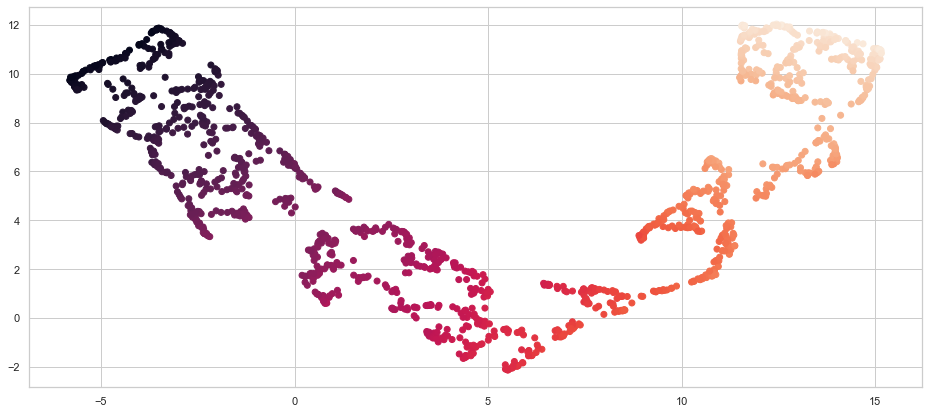

In [14]:
plt.figure(figsize=(16, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=S_color)

The result is similar to t-SNE, let's tweak `min_dist` parameter to improve the two dimensional representation.

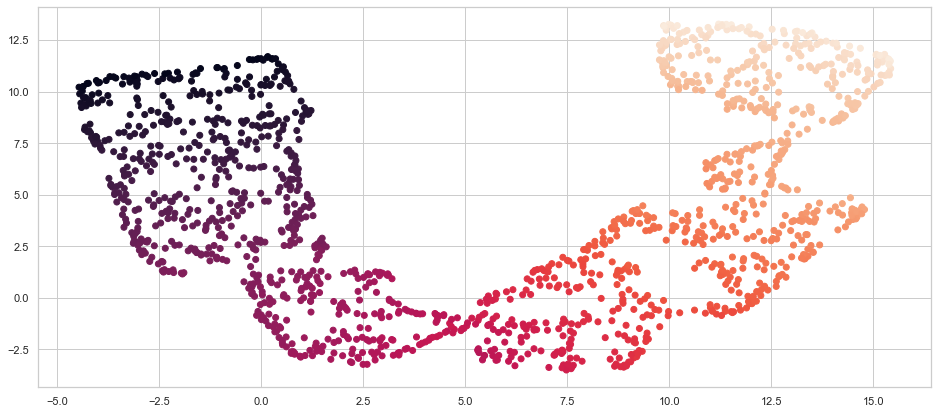

In [15]:
UMAP_ds = umap.UMAP(n_neighbors=20,min_dist=0.4)

X_reduced_ds = UMAP_ds.fit_transform(S_points)

plt.figure(figsize=(16, 7))
plt.scatter(X_reduced_ds[:, 0], X_reduced_ds[:, 1], c=S_color)

Now let's also tweak `metric`.

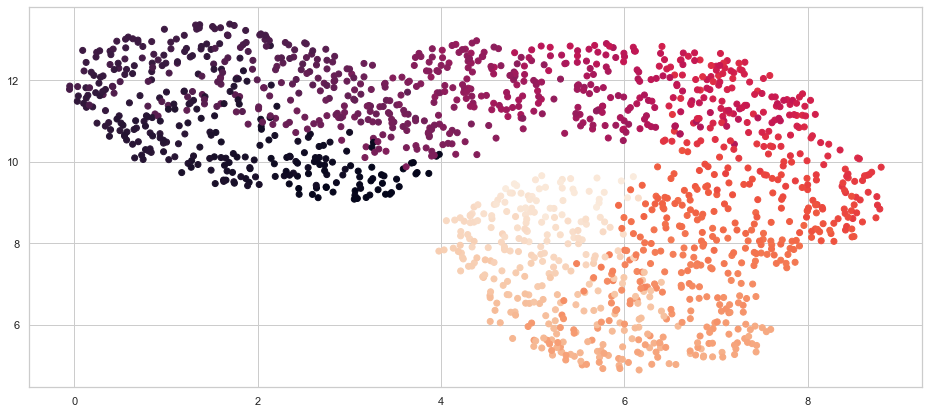

In [16]:
UMAP_mah = umap.UMAP(n_neighbors=20,min_dist=0.4,metric="mahalanobis",random_state=42)

X_reduced_mah = UMAP_mah.fit_transform(S_points)

plt.figure(figsize=(16, 7))
plt.scatter(X_reduced_mah[:, 0], X_reduced_mah[:, 1], c=S_color)

UMAP also lets us to use custom distance metric, however, the algorithm already includes many distance metric that you can easily use. Check out the metrics of UMAP [Basic UMAP Parameters](https://umap-learn.readthedocs.io/en/latest/parameters.html).

## Inverse Transform

UMAP also provides `inverse_transform`, we can use it for calculating construction error.

In [17]:
S_inverse = UMAP.inverse_transform(X_reduced)

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(S_points, S_inverse)

0.002185298240118365

## UMAP Plots

UMAP also provides plotting options under `ùmap.plot`. Let's also briefly explore these options.

In [19]:
import umap

In [20]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)# let's load MNIST Numbers 
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]

Firstly, let's look at the parameters that we can use:

In [21]:
import inspect
inspect.getargspec(umap.plot.connectivity)

C:\Users\gorke\AppData\Local\Temp\ipykernel_18172\1712150843.py:2: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  inspect.getargspec(umap.plot.connectivity)


ArgSpec(args=['umap_object', 'edge_bundling', 'edge_cmap', 'show_points', 'labels', 'values', 'theme', 'cmap', 'color_key', 'color_key_cmap', 'background', 'width', 'height'], varargs=None, keywords=None, defaults=(None, 'gray_r', False, None, None, None, 'Blues', None, 'Spectral', 'white', 800, 800))

Now let's use UMAP on MNIST Numbers and explore some of the parameters above.

In [22]:
umap = umap.UMAP(n_neighbors=5)

In [23]:
X_reduced=umap.fit(X)

In [25]:
import umap.plot
uplot=umap.plot

<AxesSubplot:>

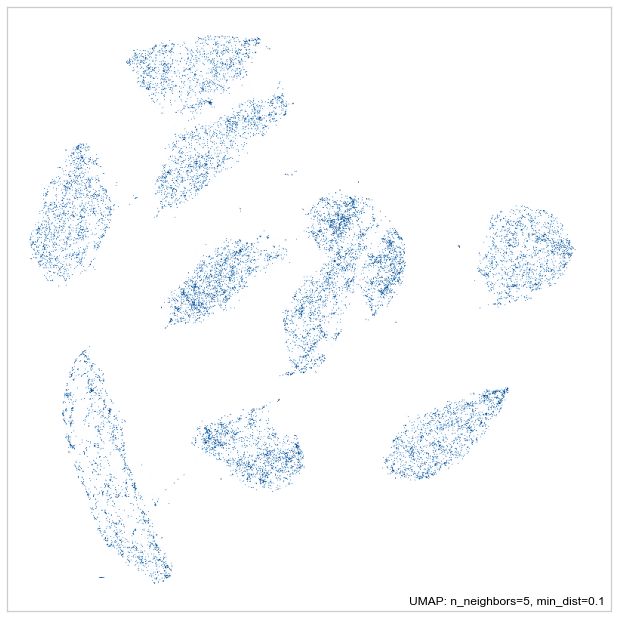

In [26]:
uplot.points(X_reduced)

We created the most basic plot above. We can use `labels` parameter and make the plot a bit more informative.

<AxesSubplot:>

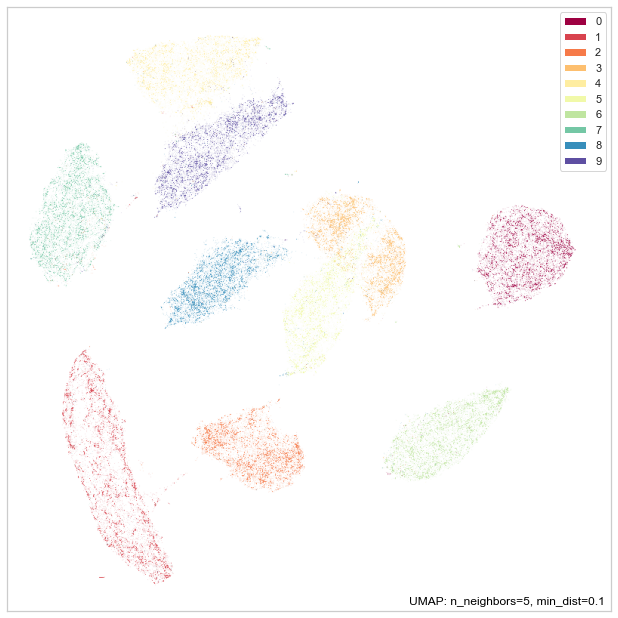

In [27]:
uplot.points(X_reduced, labels=mnist.target)

I will also change background.

<AxesSubplot:>

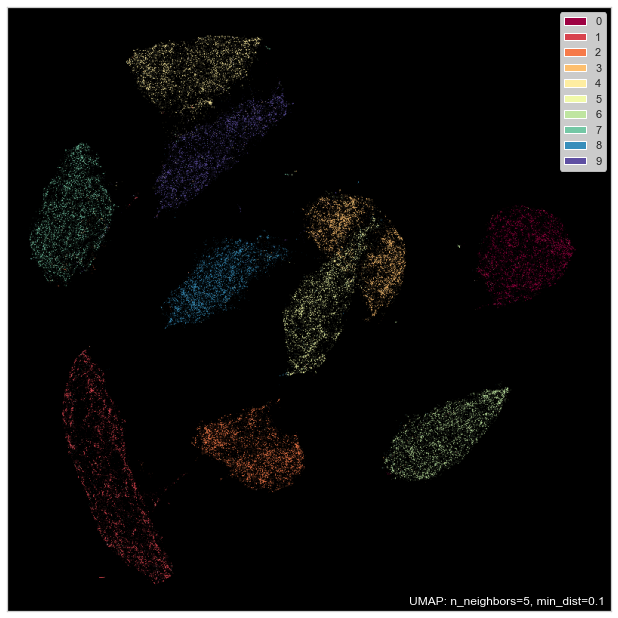

In [28]:
uplot.points(X_reduced, labels=mnist.target, background='black')

UMAP offers us an parameter named `theme` that we can use for changing color of the representation.

<AxesSubplot:>

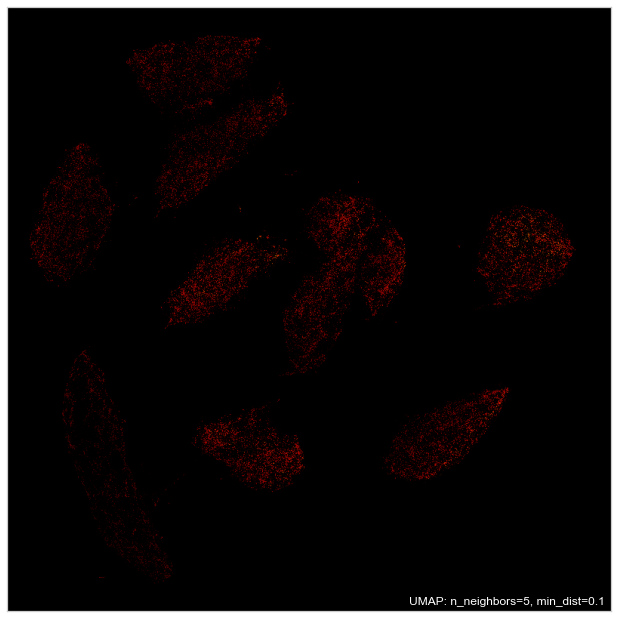

In [29]:
uplot.points(X_reduced, values=mnist.data.mean(axis=1), theme="fire")

In addition to the options provided with theme parameter, you can also `color_key_cmap` parameter for passing a colormap.

UMAP also provides connectivity plots that we can use to see the connectivity with respect to the resulting embedding. 

<AxesSubplot:>

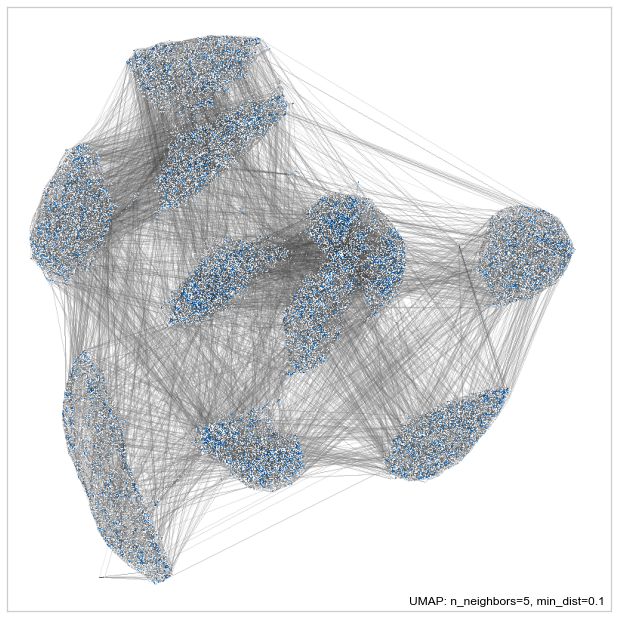

In [30]:
umap.plot.connectivity(X_reduced, show_points=True)

We can use theme parameter with connectivity plots as well.

<AxesSubplot:>

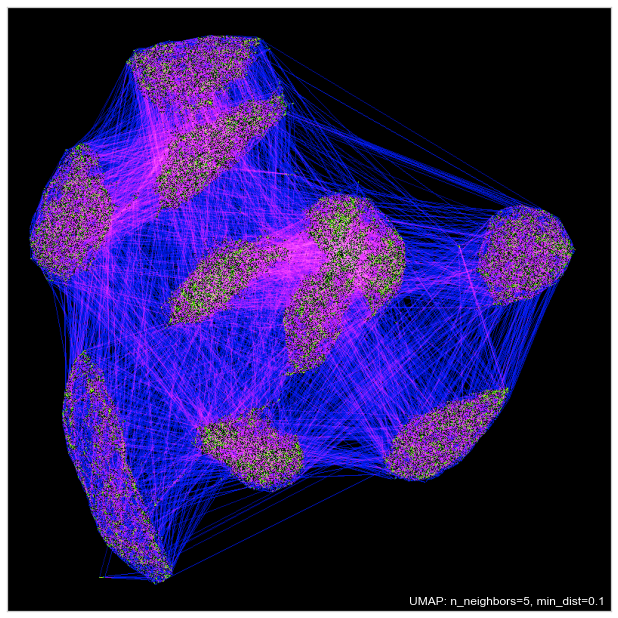

In [31]:
umap.plot.connectivity(X_reduced, show_points=True,theme="darkgreen")

Moreover, we can also use `edge_building` options provided in datashader.

C:\Users\gorke\anaconda3\lib\site-packages\umap\plot.py:885: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<AxesSubplot:>

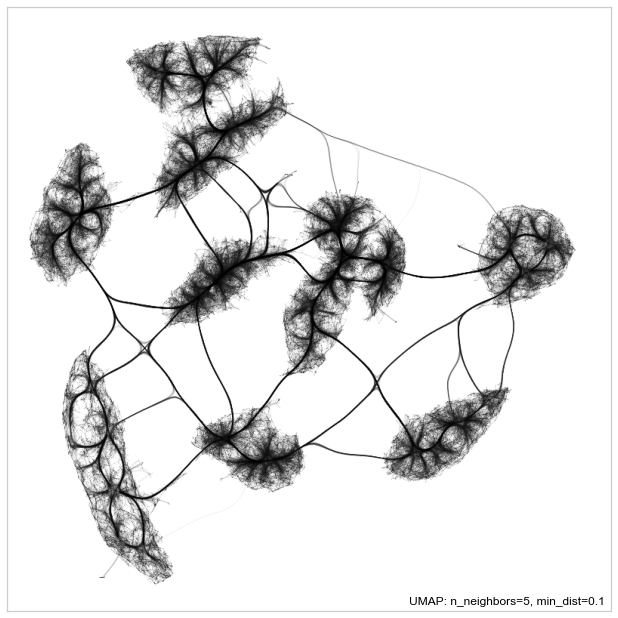

In [32]:
umap.plot.connectivity(X_reduced, edge_bundling='hammer')

There are actually much more options that we can use with `umap.plot` such as interactive plots and diagnostic plots. Check out the documentation for learning more [link](https://umap-learn.readthedocs.io/en/latest/plotting.html)

## Supervised / Semi-supervised Dimensionality Reduction with UMAP

UMAP also lets us using the algorithm as an supervised dimensionality reduction algorithm. Let's see an example: I will use the algorithm for reducing the dimension of MNIST Numbers by using both supervised and unsupervised option.

In [33]:
umap = umap.UMAP(n_neighbors=5)

In [34]:
mnist_reduced=umap.fit_transform(X)

In [35]:
sns.set_theme(style="white")

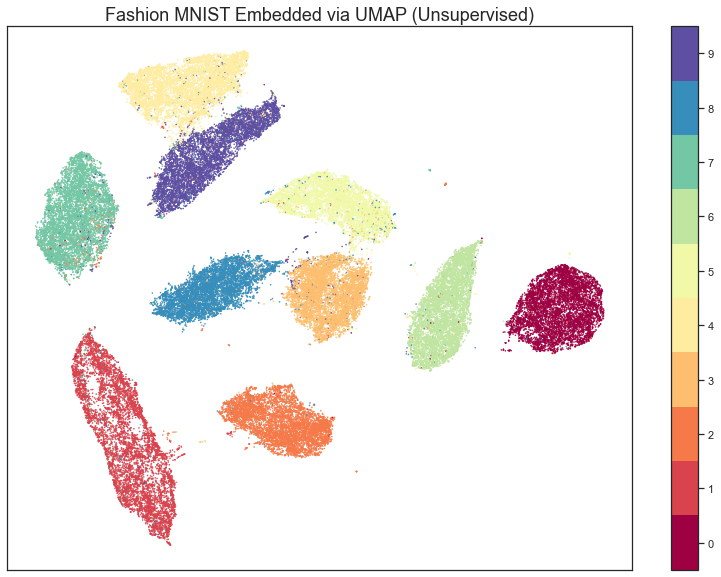

In [36]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mnist_reduced.T, s=0.3, c=y, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(np.unique(mnist.target))
plt.title('Fashion MNIST Embedded via UMAP (Unsupervised)',fontsize=18);

Let's now use the supervised version.

In [37]:
mnist_reduced_s = umap.fit_transform(X, y=y)

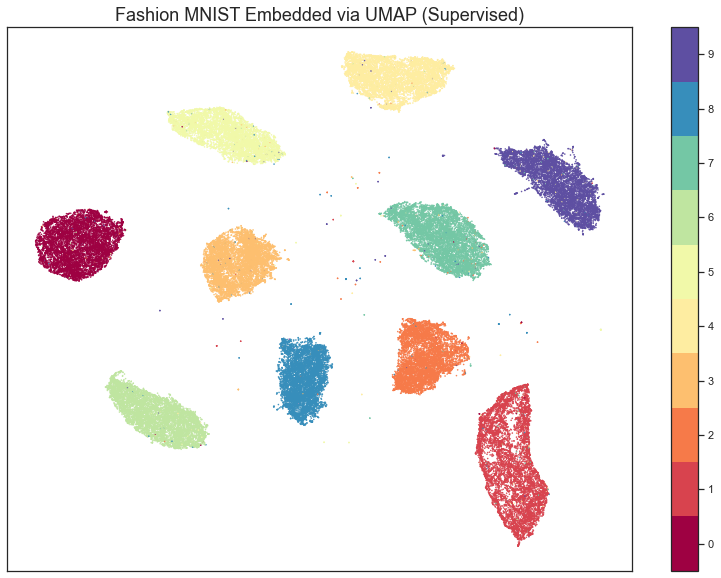

In [38]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mnist_reduced_s.T, s=0.3, c=y, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(np.unique(mnist.target))
plt.title('Fashion MNIST Embedded via UMAP (Supervised)',fontsize=18);

The seperation between classes is more obvious compared to the unsupervised option. We can also use UMAP as a semi-supervised dimensionality reduction algorithm. Let's see how semi-supervised version will perform.

I will set some labels to -1 in target so that UMAP will interpret the -1 label as being an unlabelled point.

In [39]:
masked_target = y.copy().astype(np.int8)
masked_target[np.random.choice(70000, size=10000, replace=False)] = -1

In [40]:
mnist_reduced_fit = umap.fit(X, y=masked_target)

In [41]:
mnist_reduced_ss = mnist_reduced_fit.embedding_

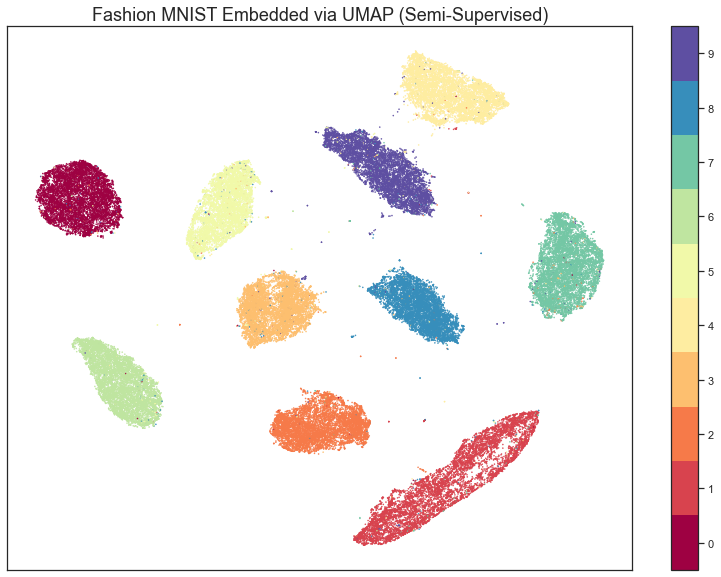

In [42]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*mnist_reduced_ss.T, s=0.3, c=y, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(np.unique(mnist.target))
plt.title('Fashion MNIST Embedded via UMAP (Semi-Supervised)',fontsize=18);

Lastly, let's also create the plot in which we show both labels and low-dimensional representation together.

In [43]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = sns.color_palette("rocket", as_cmap=True)
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], s=0.5) 
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image,cmap="binary"), image_coord)
                ax.add_artist(imagebox)

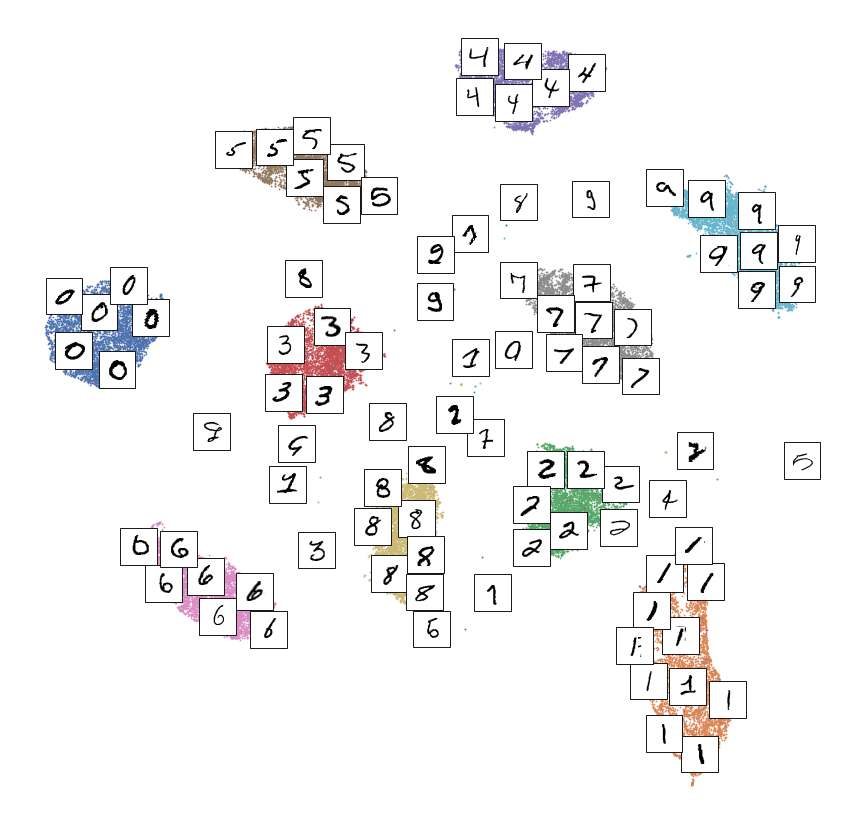

In [44]:
plot_digits(mnist_reduced_s, y, images=X, figsize=(15, 15))

We can even use UMAP for metric learning in which we try to learn unlabeled data by using a previously learnt distance metric. Check out the documentation for more [UMAP for Supervised Dimension Reduction and Metric Learning](https://umap-learn.readthedocs.io/en/latest/supervised.html#using-partial-labelling-semi-supervised-umap) 

UMAP provides us much more things that we can use: we can also use it for clustering and outlier detection, as well as document embedding and more... I will use the algorithm for clustering and outlier detection in the upcoming notebooks but you can check it out in advance on the documentation. Check it out definetely !!